# Aplicando SVD a una imagen

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
img = Image.open("img/001.jpg")
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3693x3456 at 0x7FD3CC5B51C0>


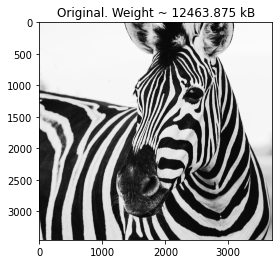

In [3]:
# vamos a trabajar nada más con una blanco y negro
gray_img = img.convert("L") # esto la convierte a blanco y negro
gray_img_mat = np.asarray(gray_img) # lo pasamos a un numpy array
original_size_kb = gray_img_mat.nbytes / 1024
plt.title(f"Original. Weight ~ {original_size_kb} kB")
plt.imshow(gray_img_mat, cmap="gray")

In [4]:
U, D, V = np.linalg.svd(gray_img)

In [5]:
print(U.shape)
print(D.shape)
print(V.shape)

(3456, 3456)
(3456,)
(3693, 3693)


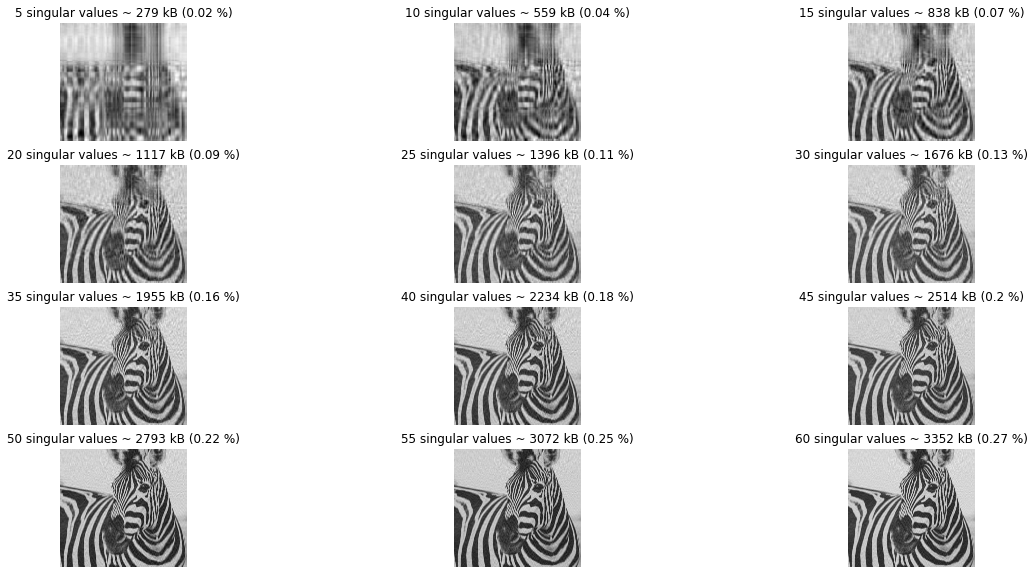

In [6]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    n_vectors = i * 5
    img_compressed = U[:, :n_vectors] @ np.diag(D[:n_vectors]) @ V[:n_vectors, :]
    size_kb = round((U[:, :n_vectors].nbytes + D[:n_vectors].nbytes + V[:n_vectors, :].nbytes) / 1024)
    ax.imshow(img_compressed, cmap="gray")
    ax.axis('off')
    ax.set_title(f"{n_vectors} singular values ~ {size_kb} kB ({round(size_kb / original_size_kb, 2)} %)")
    plt.imsave(f"out_img/out001_{n_vectors}.jpg", img_compressed, cmap="gray")
    # una buena forma de ver la magia de la compresión
    # es cambiarle el formato al archivo (digamos png, o alguno de tipo lossless compression)
    # y compararlo con el jpg (compararlos en tamaño de archivo)

#fig.savefig("out_img/out001.png")

In [ ]:
img = Image.open("img/003.jpg")
gray_img = img.convert("L") # esto la convierte a blanco y negro
gray_img_mat = np.asarray(gray_img) # lo pasamos a un numpy array
original_size_kb = gray_img_mat.nbytes / 1024
plt.title(f"Original. Weight ~ {original_size_kb} kB")
plt.imshow(gray_img_mat, cmap="gray")

U, D, V = np.linalg.svd(gray_img)

fig = plt.figure(figsize=(20, 10))
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    n_vectors = i * 5
    img_compressed = U[:, :n_vectors] @ np.diag(D[:n_vectors]) @ V[:n_vectors, :]
    size_kb = round((U[:, :n_vectors].nbytes + D[:n_vectors].nbytes + V[:n_vectors, :].nbytes) / 1024)
    ax.imshow(img_compressed, cmap="gray")
    ax.axis('off')
    ax.set_title(f"{n_vectors} singular values ~ {size_kb} kB ({round(size_kb / original_size_kb, 2)} %)")

# Pseudo inversa

Sea $A^+ \in M_{nxm}$ la pseudoinversa. Si $A = U \Sigma V^T$, entonces

$$
A^+ = (U \Sigma V^T)^+ = V^{T^+} \Sigma^+ U^+
$$

Como $V$ y $U$ son cuadradas, su pseudoinversa es de hecho la inversa, y además ésta es la transpuesta (visto en la unidad 1)

$$
A^+ = V^{{-1}^{-1}} \Sigma^+ U^{-1} = V \Sigma^+ U^T
$$

Para hallar $\Sigma^+$, revisamos que como es diagonal, su pseudoinversa será:

$$
\Sigma^+ = \begin{bmatrix}
\frac{1}{\sigma_1} & 0                  & 0\\
0                  & \frac{1}{\sigma_2} & 0\\
0                  & 0                  & \ddots\\
\end{bmatrix}
$$

Si $\Sigma$ es de dimensiones $nxm$, entonces $\Sigma^+$ deberá de ser $mxn$.

Así si multiplicamos $\Sigma \Sigma^+$ obtenemos algo similar a $I$ de dimensiones $nxn$, y si hacemos $\Sigma^+ \Sigma$ obtenemos algo similar a $I$ de dimensiones $mxm$. Si hay algún $\sigma = 0$, entonces no hay cómo obtener la identidad, pero se puede tener algo muy similar.

In [8]:
A = np.array([
    [2, 3],
    [5, 7],
    [11, 13]
])

In [9]:
U, D, V = np.linalg.svd(A)

In [10]:
D_pse = np.zeros(A.shape).T
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

A_pse = V.T @ D_pse @ U.T
print(A_pse)
print(np.linalg.pinv(A)) # calcular la pseudoinversa con numpy

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]
[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


Veamos qué pasa si hacemos $A^+ A$ y $A A^+$

$$
A A^+ = U \Sigma V^T V \Sigma^+ U^T = U \Sigma \Sigma^+ U^T
$$

$$
A^+ A = V \Sigma^+ U^T U \Sigma V^T = V \Sigma^+ \Sigma V^T
$$

Si $\Sigma \Sigma^+ = I \iff A A^+ = A$

Si $\Sigma^+ \Sigma = I \iff A^+ A = A$

Creo que ambas cosas suceden solo si $A$ es _full rank_, i.e. $r = n = m$, o sea la matriz es cuadrada e invertible (lo que resulta en que todos los $\sigma \neq 0$). Así que en general $A A^+ \neq A^+ A$, y solo un producto dará la identidad

In [11]:
A_pse @ A

array([[ 1.00000000e+00, -1.77635684e-15],
       [ 4.44089210e-16,  1.00000000e+00]])

In [12]:
A @ A_pse

array([[ 0.25773196,  0.43298969, -0.06185567],
       [ 0.43298969,  0.74742268,  0.03608247],
       [-0.06185567,  0.03608247,  0.99484536]])

In [13]:
D_m = np.zeros(A.shape)
D_m[:D.shape[0], :D.shape[0]] = np.diag(D)
#print(D_m)
print(D_pse @ D_m)
print(D_m @ D_pse)

[[1. 0.]
 [0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [14]:
print(D_pse @ D_m)
print(V.T @ V)
print(V @ V.T)

[[1. 0.]
 [0. 1.]]
[[ 1.00000000e+00 -1.99057351e-17]
 [-1.99057351e-17  1.00000000e+00]]
[[1.00000000e+00 1.99057351e-17]
 [1.99057351e-17 1.00000000e+00]]


Como $\Sigma \Sigma^+ \neq I$ entonces $A A^+ \neq I$

In [15]:
A = np.array([
    [4, 1],
    [-2, 1],
    [3, 1]
])
b = np.array([3, 5, 1]).T
np.linalg.pinv(A)

array([[ 0.11290323, -0.17741935,  0.06451613],
       [ 0.14516129,  0.62903226,  0.22580645]])

In [16]:
np.linalg.pinv(A) @ A

array([[ 1.00000000e+00,  5.55111512e-17],
       [-2.77555756e-17,  1.00000000e+00]])

In [17]:
np.linalg.pinv(A) @ b

array([-0.48387097,  3.80645161])

## PCA

Estos posts están buenos (aunque algo simples)

https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9

https://towardsdatascience.com/principal-component-analysis-pca-79d228eb9d24

Aquí algunas demostraciones para entenderlo mejor

![cov](https://miro.medium.com/max/500/1*mSPg5pSSZxYRVgOWyDEw9w.png)

Demostración ($X_i$ es una dimensión/variable/característica y un vector columna):

$$
Cov(X_j, X_j) = Cov(X_i, X_j) = \frac{1}{n} \sum (X_{ik} - \bar{X_i})(X_{jk} - \bar{X_j}) = \frac{1}{n} (X_i - \bar{X_i})^T (X_j - \bar{X_j})\\
$$

Si las filas están estandarizadas, o sea, previamente se hizo $X_i = X_i - \bar{X_i}$, entonces $\bar{X_i} = 0$.

Demostración:

Si $X = \begin{bmatrix} x_1 & x_2 & \dots & x_n \end{bmatrix}$ donde $x_i \in R, \bar{x} = \frac{x_1 + x_2 + \dots + x_n}{n}$, y $X' = \begin{bmatrix} x_1 - \bar{x} & x_2 - \bar{x} & \dots & x_n - \bar{x} \end{bmatrix}$, entonces

$$
\bar{x'} = \frac{x_1 - \bar{x} + x_2 - \bar{x} + \dots + x_n - \bar{x}}{n} = \frac{x_1 + x_2 + \dots + x_n - n\bar{x}}{n} = \frac{x_1 + x_2 + \dots x_n - (x_1 + x_2 + \dots x_n)}{n} = 0
$$

Por lo tanto

$$
Cov(X_j, X_j) = Cov(X_i, X_j) = \frac{1}{n} X_i^T X_j\\
$$

Sea 
$$
X = \begin{bmatrix}
X_1 & X_2 & \dots & X_d
\end{bmatrix}
$$
(cada $X_i$ es una dimensión y un vector columna, o sea $X_{i1}$ es el valor de la primera observación para la variable $X_i$), entonces

$$
\frac{1}{n} X^T X = \frac{1}{n} \begin{bmatrix}
X_1\\
X_2\\
\vdots\\
X_d
\end{bmatrix} \begin{bmatrix}
X_1 & X_2 & \dots & X_d
\end{bmatrix} = \frac{1}{n} \begin{bmatrix}
X_1^T X_1 & X_1^T X_2 & \dots  & X_1^T X_d\\
X_2^T X_1 & X_2^T X_2 & \dots  & X_2^T X_d\\
\vdots    & \vdots    & \ddots & \vdots\\
X_d^T X_1 & X_d^T X_2 & \dots  & X_d^T X_d
\end{bmatrix} = \frac{1}{n} \begin{bmatrix}
Var(X_1)      & Cov(X_1, X_2)  & \dots  & Cov(X_1, X_d)\\
Cov(X_2, X_1) & Var(X_2)       & \dots  & Cov(X_2, X_d)\\
\vdots    & \vdots    & \ddots & \vdots\\
Cov(X_d, X_1) & Cov(X_d, X_2)  & \dots  & Var(X_d)
\end{bmatrix}
$$

**Nota**: Como $X^T X$ es simétrica, los eigenvectores calculados serán ortogonales (ver unidad 1)

## Código 1

In [88]:
from sklearn import datasets
from matplotlib import pyplot as plt

In [89]:
data = datasets.fetch_olivetti_faces()

(400, 64, 64)

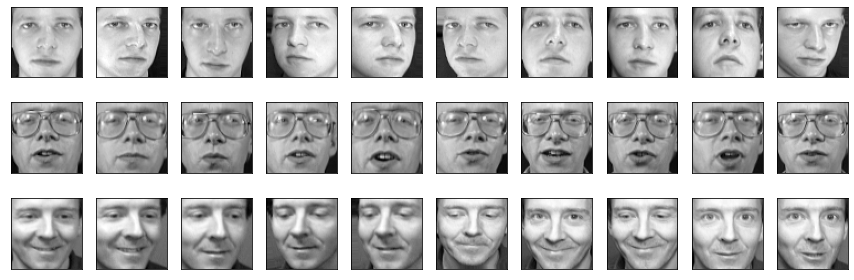

In [90]:
fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap="gray")
data.images.shape

Antes de aplicar PCA habremos de entender lo que vamos a hacer.

Tenemos una matriz de dimensiones $(400, 64, 64)$ (400 imágenes cada una de 64 por 64 pixeles). Cada imagen es una observación, entonces para tener una matriz $X$ donde las filas sean las observaciones, y las columnas las variables hay que hacer un `flat` a cada imagen para que se conviertan en vectores fila.

(400, 4096)

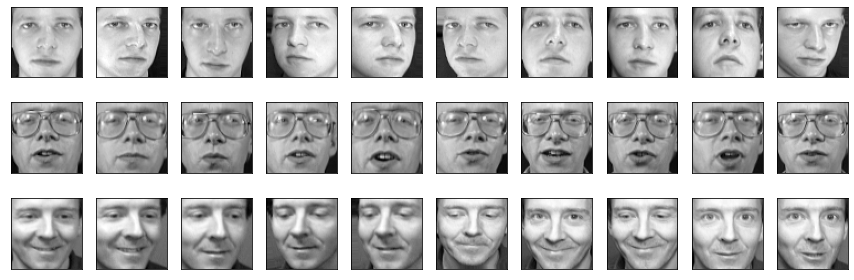

In [91]:
Xo = data.images.reshape(400, 64 * 64) # Xo: X original

# revisamos que no se haya roto nada
fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    ax.imshow(Xo[i].reshape(64, 64), cmap="gray")
Xo.shape

Ahora sí tenemos una matriz de $(400, 4096)$ donde cada fila es una observación. Empecemos a hacer PCA

### Estandarización

A continuación vamos a hacerlo *by the book*, vamos a quitarle la media y todo lo demás justo como lo indica PCA

(4096,)


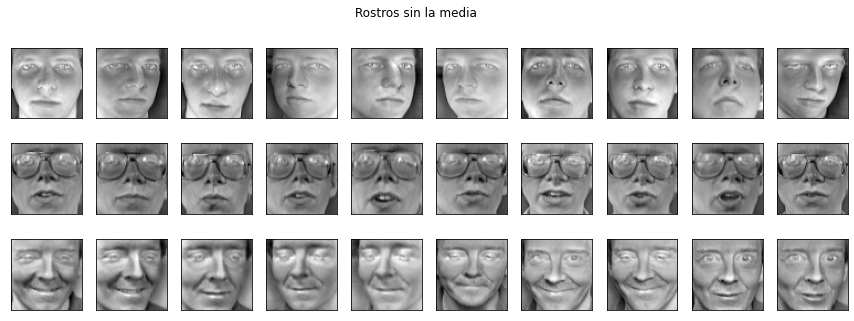

In [92]:
n_samples = Xo.shape[0]
print(np.mean(Xo, axis=0).shape) # debe ser un vector con 4096 datos (la media de cada columna)
X = Xo - np.mean(Xo, axis=0) # a cada columna le restamos su media: Xi - \bar{Xi}. Esto usa broadcasting

fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Rostros sin la media")
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(64, 64), cmap="gray")

### Obtención de $S$ y $u$

In [24]:
Cov = X.T @ X # matriz de covarianza
S = 1 / n_samples * Cov
eigvals, eigvects = np.linalg.eig(S) # los eigenvectores son los que optimizan el lagrangiano. Estos son las u
eigvects.shape # debe ser de 4096 x 4096. Cada columna es un eigenvector

(4096, 4096)

### Visualización de los Principal Components (PC's)

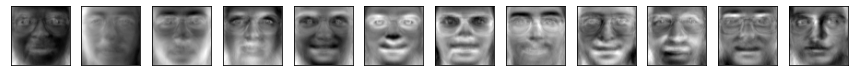

In [25]:
n_pcs = 12
PCs = eigvects

fig, axes = plt.subplots(1, n_pcs, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    PCi = PCs[:, i]
    ax.imshow(PCi.reshape(64, 64), cmap="gray")

### Proyección

$$
proy_u x_i = \frac{<u, x_i>}{||u||^2} u = <u, x_i> u = u^T x_i^T u
$$

($u$ es vector columna, $x_i$ es una observación, vector fila, por eso se requiere transponer al final)

Si tenemos $n$ $u$'s ($n$ PC's), entonces

$$
proy_{u_1} x_i + proy_{u_2} x_i + \dots + proy_{u_n} x_i = u_1^T x_i^T u_1 + u_2^T x_i^T u_2 + \dots + u_n^T x_i^T u_n = U U^T x_i^T
$$

$U^T x_i^T$ debe resultar en un vector columna de longitud $n$. El i-ésimo elemento corresponde con la proyección escalar de $x$ (la observación) en el i-ésimo componente principal.

$U (U^T x_i^T)$ debe resultar en la suma de las proyecciones vectoriales sobre todos los $u$, debe ser un vector columna de longitud $d$ (misma longitud que $u$ y que $x_i$)

Para verlo mejor (cada $u_i$ tiene longitud $d$, cada $X_{ij}$ es una dimensión/variable de la observación $x_{ij}$):

$$
\begin{split}
U (U^T X_i^T) &= \begin{bmatrix}
u_1 & u_2 & \dots & u_n
\end{bmatrix}
\begin{bmatrix}
u_1\\
u_2\\
\vdots\\
u_n
\end{bmatrix}
\begin{bmatrix}
X_{i1}\\
X_{i2}\\
\vdots\\
X_{id}
\end{bmatrix}
\forall X_{ij} \in R\\
&= \begin{bmatrix}
u_1 & u_2 & \dots & u_n
\end{bmatrix}
\begin{bmatrix}
proy_{u_1} x_i\\
proy_{u_2} x_i\\
\vdots\\
proy_{u_n} x_i
\end{bmatrix}\\
&= \sum_k^n u_k proy_{u_k} x_i
\end{split}
$$

Obviamente, si queremos proyectar varios $x_i$ (varias observaciones), hacemos

$$
\begin{bmatrix}
u_1 & u_2 & \dots & u_n
\end{bmatrix}
\begin{bmatrix}
u_1\\
u_2\\
\vdots\\
u_n
\end{bmatrix}
\begin{bmatrix}
X_{i1} & \dots  & X_{j1}\\
X_{i2} & \dots  & X_{j2}\\
\vdots & \ddots & \vdots\\
X_{id} & \dots  & X_{jd}
\end{bmatrix}
= \begin{bmatrix}
u_1 & u_2 & \dots & u_n
\end{bmatrix}
\begin{bmatrix}
proy_{u_1} x_i & \dots  & proy_{u_1} x_j\\
proy_{u_2} x_i & \dots  & proy_{u_2} x_j\\
\vdots         & \ddots & \vdots\\
proy_{u_n} x_i & \dots  & proy_{u_n} x_j
\end{bmatrix}
$$

Cada columna en la matriz resultante corresponde a la proyección de $x_k \forall k:\ i \leq k \leq j$ sobre los PC's

Text(0.5, 1.0, 'Proyección primer imagen sobre 1 PC (el más significativo)')

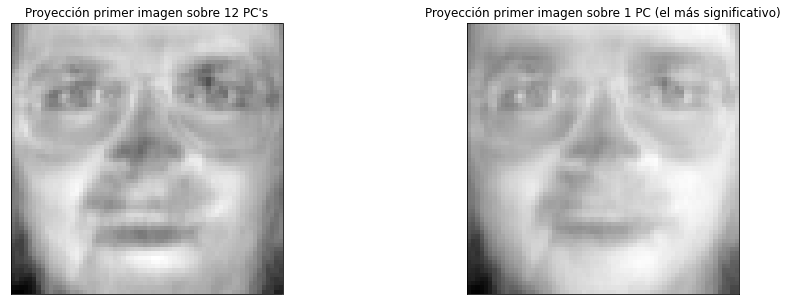

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
U = PCs[:, :n_pcs]
scalar_proj = U.T @ X[0] # NO hacer esto! (ver más abajo) se proyecta el dato original
#scalar_proj = U.T @ Xo[0]
axes[0].imshow((U @ scalar_proj).reshape(64, 64), cmap="gray")
axes[0].set_title(f"Proyección primer imagen sobre {n_pcs} PC's")

u = PCs[:, 0]
scalar_proj = u.T @ X[0] # NO hacer esto! (ver más abajo) se proyecta el dato original
#scalar_proj = u.T @ Xo[0]
axes[1].imshow((scalar_proj * u).reshape(64, 64), cmap="gray")
axes[1].set_title(f"Proyección primer imagen sobre 1 PC (el más significativo)")

(4096, 30)


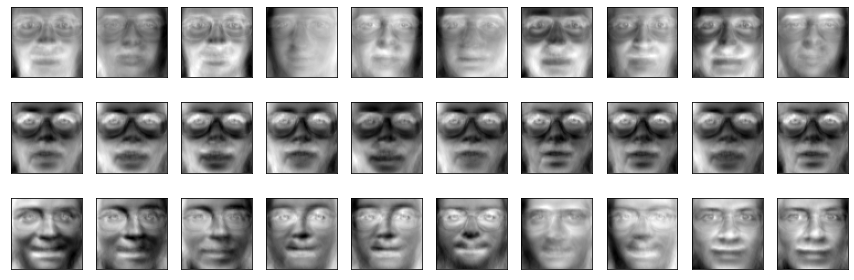

In [27]:
U = PCs[:, :n_pcs]
scalar_proj = U.T @ X[:30, :].T # vamos a proyectar 30 caras
proj = U @ scalar_proj
print(proj.shape) # debe ser 4096 x 30

fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
proj = proj.T
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

### Usando `PCA` (sklearn)

In [93]:
from sklearn import decomposition

In [94]:
faces_pca = decomposition.PCA(n_components=n_pcs)
faces_pca.fit(X)

PCA(n_components=12)

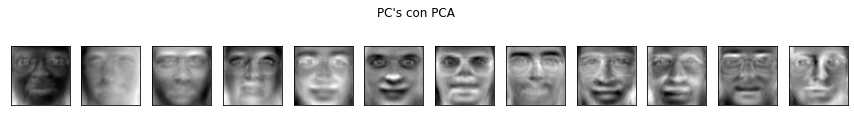

In [95]:
fig, axes = plt.subplots(1, n_pcs, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("PC's con PCA")
for i, ax in enumerate(axes.flat):
    PCi = faces_pca.components_[i]
    ax.imshow(PCi.reshape(64, 64), cmap="gray")

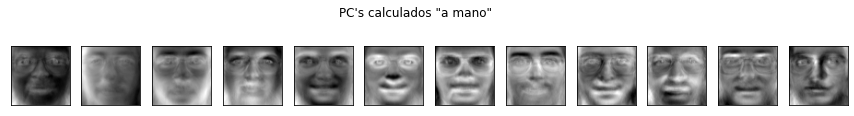

In [96]:
fig, axes = plt.subplots(1, n_pcs, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("PC's calculados \"a mano\"")
for i, ax in enumerate(axes.flat):
    PCi = PCs[:, i]
    ax.imshow(PCi.reshape(64, 64), cmap="gray")

Si los comparamos vemos que son prácticamente iguales los componentes, lo único que cambia es que algunos tienen sus colores invertidos **¿porqué será?** (no es una pregunta retórica)

### Proyecciones

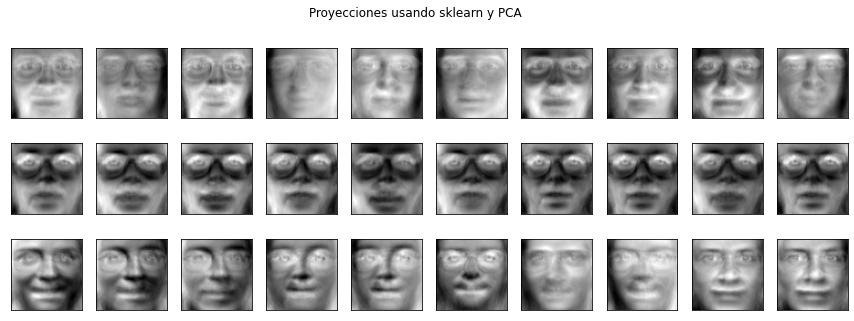

In [97]:
components = faces_pca.transform(X[:30]) # solo 30 caras
proj = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones usando sklearn y PCA")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

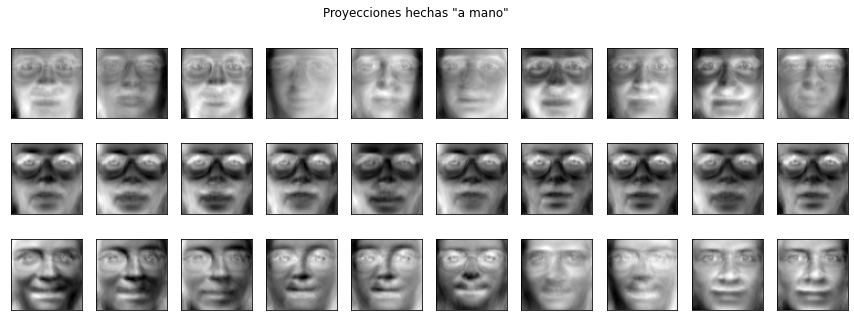

In [98]:
U = PCs[:, :n_pcs]
scalar_proj = U.T @ X[:30, :].T # vamos a proyectar 30 caras
proj = U @ scalar_proj

fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones hechas \"a mano\"")
proj = proj.T
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

Las proyecciones son las mismas a pesar de que los PC's salieron diferentes **¿porqué será?** (no es una pregunta retórica)

En fin, ahora veamos porqué salen tan negras las caras. Probablemente sea por la interpretación de los números, más que por un cálculo mal

In [114]:
# print(np.amin(X), np.amax(X))
# print(np.amin(U), np.amax(U))

# print("PC negro")
# print(PCs[0, :].reshape(64, 64))

# print("PC blanco (abajo)")
# print(PCs[2, :].reshape(64, 64))

Los valores negativos son negro, los positivos son blanco. Vamos a intentar invertirlos 

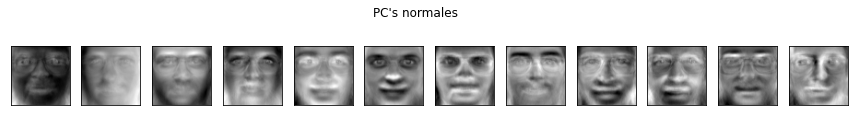

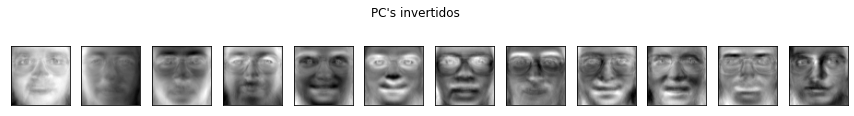

In [100]:
fig, axes = plt.subplots(1, n_pcs, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("PC's normales")
for i, ax in enumerate(axes.flat):
    PCi = faces_pca.components_[i]
    ax.imshow(PCi.reshape(64, 64), cmap="gray")

fig, axes = plt.subplots(1, n_pcs, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("PC's invertidos")
for i, ax in enumerate(axes.flat):
    PCi = -faces_pca.components_[i]
    ax.imshow(PCi.reshape(64, 64), cmap="gray")

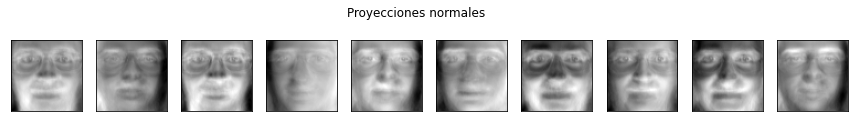

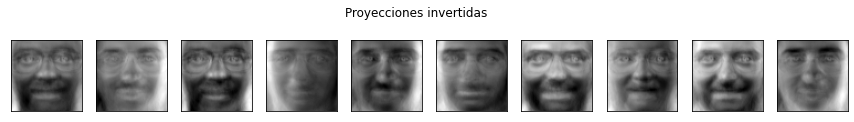

In [101]:
components = faces_pca.transform(X[:10])
proj = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones normales")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones invertidas")
for i, ax in enumerate(axes.flat):
    ax.imshow(-proj[i].reshape(64, 64), cmap="gray")

No funciona, veamos qué pasa si no le quitamos la media (a partir de ahí se tornaron negros los rostros).

Lo importante de esto es que ya vimos como sacar los PC's manualmente y matemáticamente qué significan. En palabras cortas: los PC's son los vectores que minimizan la distancia entre los vectores (puntos) x y la recta que genera el PC.

NEL. LA PROYECCIÓN SE DEBE HACER CON LOS DATOS ORIGINALES NO CON LOS DATOS ESTANDARIZADOS*. Esto lo descubrí después de hacer el código de abajo. Tiene todo el sentido del mundo. No borro lo anterior porque de los errores se aprende 😆

\* Ver final del documento

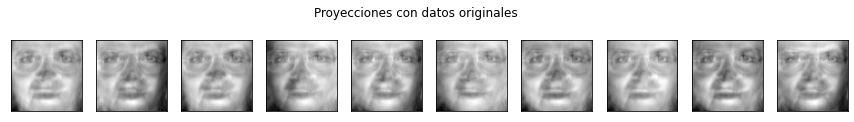

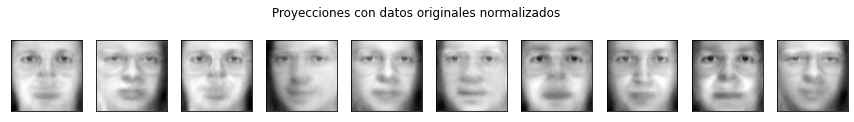

In [149]:
components = faces_pca.transform(Xo[:10])
proj = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones con datos originales")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

components = faces_pca.transform(Xo[:10] / 255)
proj = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones con datos originales normalizados")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

Ver más abajo explicación de porqué se ven medio raros y como que se nota que traía lentes

## Código 2

### Estandarización

A continuación vamos a hacerlo como lo hizo el profe (más o menos)

Vamos a normalizar en lugar de estandarizar

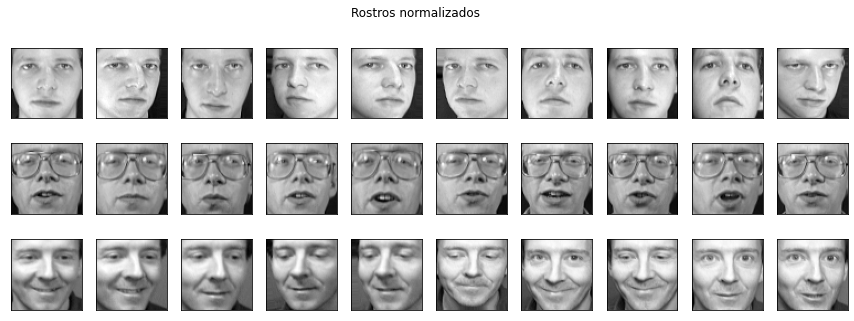

In [102]:
X = Xo / 255 # ahora el rango es de 0 - 1

fig, axes = plt.subplots(3, 10, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Rostros normalizados")
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(64, 64), cmap="gray")

In [131]:
faces_pca = decomposition.PCA(n_components=12)
faces_pca.fit(X)

PCA(n_components=12)

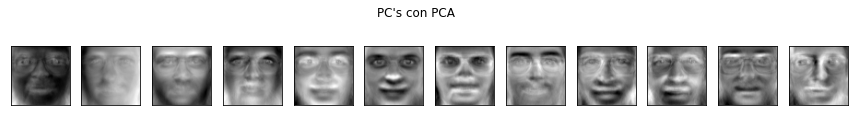

In [132]:
fig, axes = plt.subplots(1, faces_pca.n_components_, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("PC's con PCA")
for i, ax in enumerate(axes.flat):
    PCi = faces_pca.components_[i]
    ax.imshow(PCi.reshape(64, 64), cmap="gray")

Impresionantemente los PC's parecen ser los mismos que antes!

(sí, me equivoqué, los PC's los había calculado bien pero al momento de la proyección salia algo no esperado porque estaba proyectando los datos ya estandarizados)

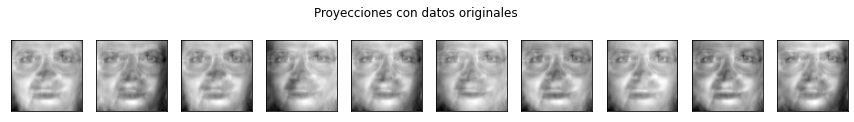

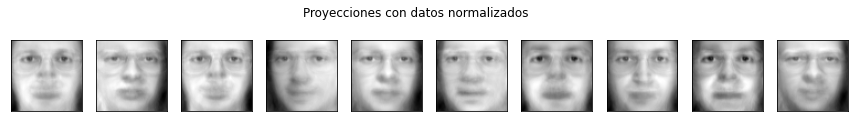

In [125]:
components = faces_pca.transform(Xo[:10])
proj = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones con datos originales")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

components = faces_pca.transform(X[:10]) # es igual que hacer la linea de abajo
# components = faces_pca.transform(Xo[:10] / 255)
proj = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones con datos normalizados")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

¿Porqué se ven diferentes las proyecciones? Las normalizadas se ven más blancas y claras, mientras que las originales se ven como más difusas

Eso es porque con los datos originales estamos proyectando datos entre 0 y 255, y las proyecciones se dispersan más, de hecho su varianza va a ser mayor

In [136]:
components = faces_pca.transform(Xo[:30])
proj = faces_pca.inverse_transform(components)
print(f"Varianza promedio de 30 proyecciones con datos originales: {np.mean(proj.var(axis=0))}")

components = faces_pca.transform(Xo[:30] / 255)
proj = faces_pca.inverse_transform(components)
print(f"Varianza promedio de 30 proyecciones con datos normalizados: {np.mean(proj.var(axis=0))}")

Varianza promedio de 30 proyecciones con datos originales: 0.011093810200691223
Varianza promedio de 30 proyecciones con datos normalizados: 1.706083736507935e-07


Se ve que en efecto, la varianza es mayor lo que significa una mayor dispersión de los datos y se ve como imagenes más difusas.

Una idea intuitiva detrás de eso es lo siguiente.

![](img/delta_big.png)

(se me olvidó marcar la escala pero supongamos que es de 0 a 255, y supongamos que las proyecciones rondan entre `0-240`) Supóngase que estas proyecciones corresponden a las imágenes originales

![](img/delta_small.png)

(supongamos que es la misma escala `0-255` pero ahora las proyecciones rondan entre `0-50`). Supóngase que estas proyecciones corresponden a las imágenes normalizadas (aunque ahí las proyecciones van de `0-1`)

La separación de los primeros tres vectores es proporcional a la separación de los segundos vectores, sin embargo $\Delta_1 > \delta_1$ y $\Delta_2 > \delta_2$.

Eso es lo que intuitivamente está pasando con las imágenes. Aunque eso también depende de cómo se muestren los datos, porque por ejemplo si forzamos una dispersión muy grande, quizá no surta efecto porque matplotlib puede hacer un escalamiento de los colores, o sea si el valor más grande es 1000 y el más bajo es 700, entonces la escala podría ser de 0 a 300 por ejemplo.

Llevemos esta idea más allá

Varianza promedio de 10 proyecciones con datos originales: 10799.927734375
Varianza promedio de 10 proyecciones con datos normalizados: 1.079992983932243e-08


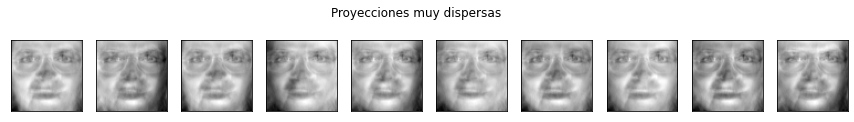

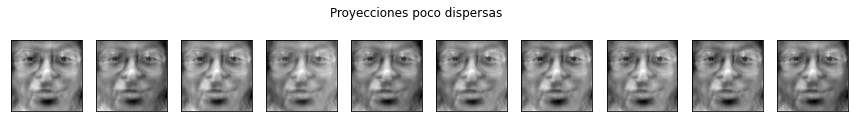

In [146]:
components = faces_pca.transform(Xo[:10] * 1000)
proj = faces_pca.inverse_transform(components)
print(f"Varianza promedio de 10 proyecciones con datos originales: {np.mean(proj.var(axis=0))}")

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones muy dispersas")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

components = faces_pca.transform(Xo[:10] / 1000) # es igual que hacer la linea de abajo
proj = faces_pca.inverse_transform(components)
print(f"Varianza promedio de 10 proyecciones con datos normalizados: {np.mean(proj.var(axis=0))}")

fig, axes = plt.subplots(1, 10, figsize=(15, 2), subplot_kw={"xticks": [], "yticks": []})
fig.suptitle("Proyecciones poco dispersas")
for i, ax in enumerate(axes.flat):
    ax.imshow(proj[i].reshape(64, 64), cmap="gray")

Se ve que tenemos más dispersión pero aún así vemos lo mismo, seguramente porque matplotlib hace su magia.

Ahora, si dividimos entre un número muy grande, la dispersión baja y vemos que muchas partes de la cara son más negras, esto es porque están muy cercanas a 0, y supongo que matplotlib no hace su magia de escalar los valores (como en el caso de mayor dispersión) si estos ya están en la escala de `0 - 1`